In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
import pandas as pd

data = pd.read_csv('UNSW_NB15.csv')
data.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [7]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [8]:
data['service'].replace('-',np.nan,inplace=True)

In [9]:
data.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [10]:
data.shape

(175341, 45)

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(81173, 45)

In [13]:
data['attack_cat'].value_counts()

Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: attack_cat, dtype: int64

In [14]:
data['state'].value_counts()

INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: state, dtype: int64

In [15]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [16]:
features = pd.read_csv('UNSW_NB15_features.csv')

In [17]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [18]:
features['Type '] = features['Type '].str.lower()

In [19]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [20]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [21]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [22]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [23]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81

In [25]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


**Data Visualization**

Binary Classification

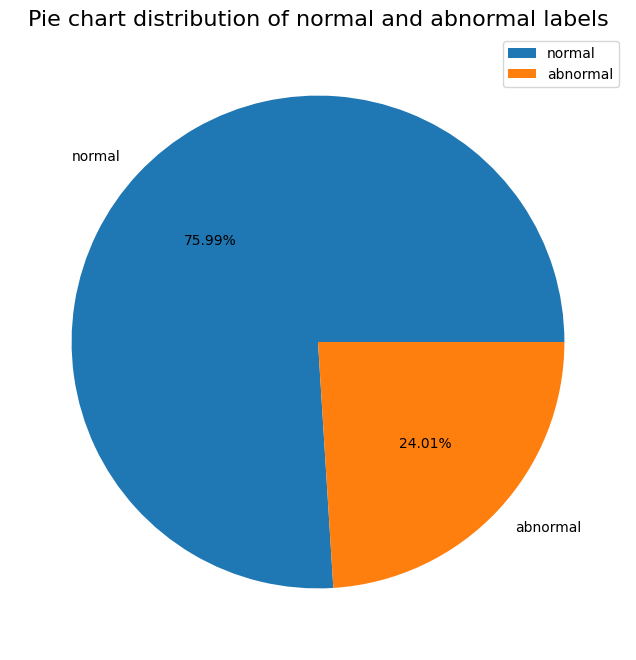

In [26]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('Pie_chart_binary.png')
plt.show()

Multi-class Classification

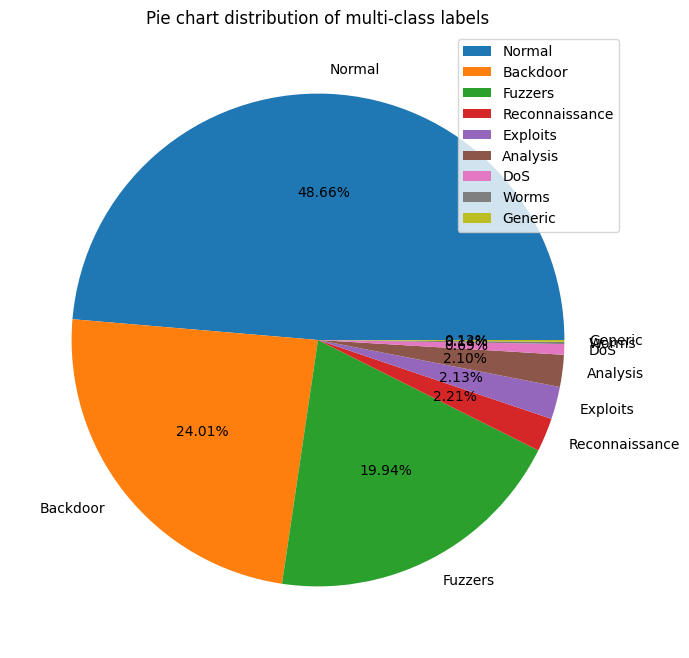

In [27]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('Pie_chart_multi.png')
plt.show()

One hot encoding

In [28]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [29]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [30]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [31]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
data.shape

(81173, 45)

In [33]:
data = pd.concat([data, data_cat],axis=1)

In [34]:
data.shape

(81173, 64)

In [35]:
data.drop(columns=cat_col,inplace=True)

In [36]:
data.shape

(81173, 61)

Data Normaliztion

In [37]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [38]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [39]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [40]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [41]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Label Encoding**

Binary Labels

In [42]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [43]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [44]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [45]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [46]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

Multi-class Labels

In [47]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [48]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [49]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [50]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [51]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

Correlation between features of dataset

In [52]:
num_col.append('label')

Correlation Matrix for Binary Labels

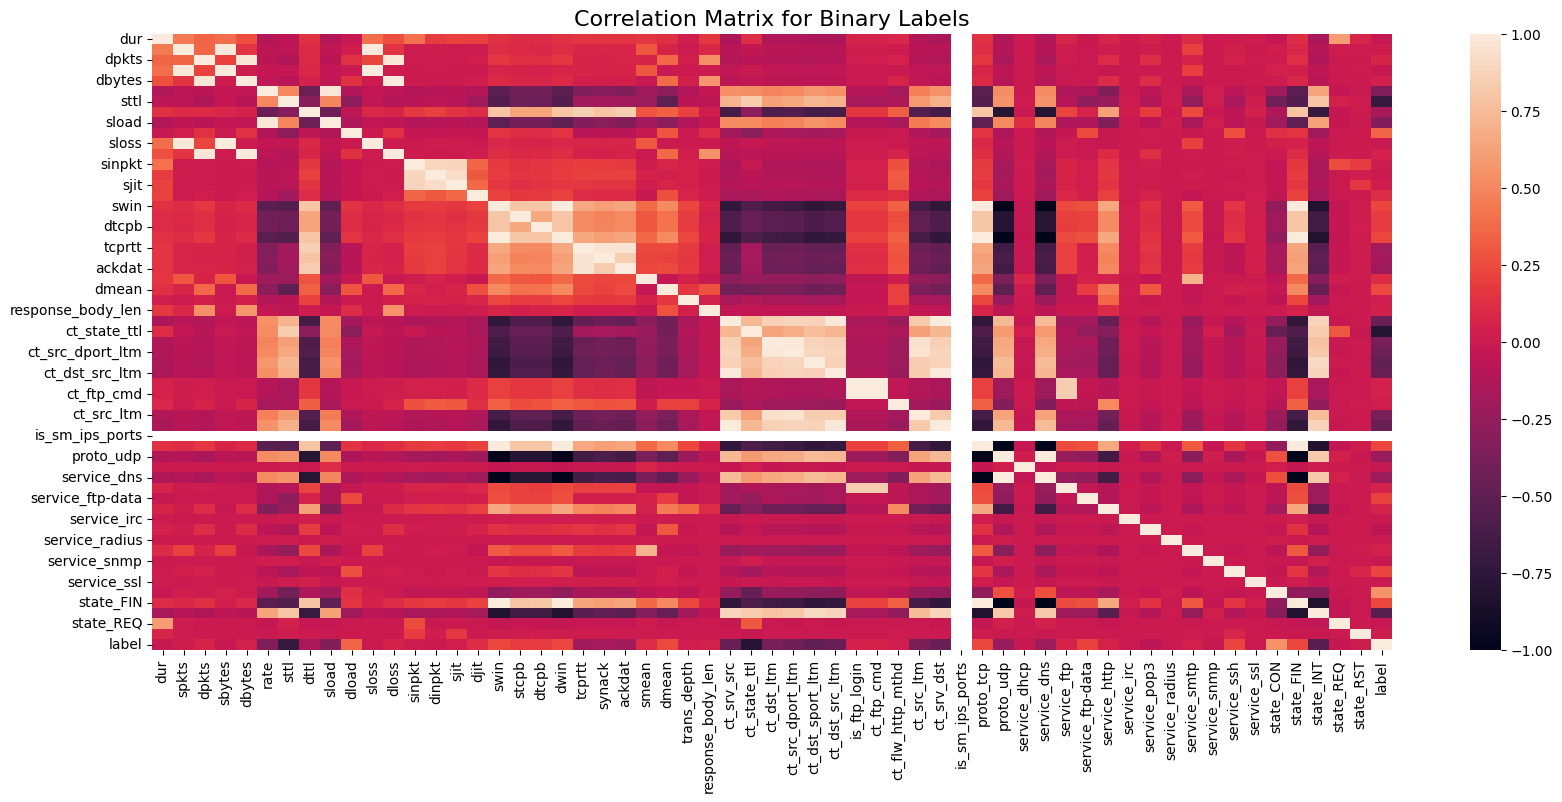

In [53]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('correlation_matrix_bin.png')
plt.show()

Correlation Matrix for Multi-class Labels

In [54]:
num_col = list(multi_data.select_dtypes(include='number').columns)

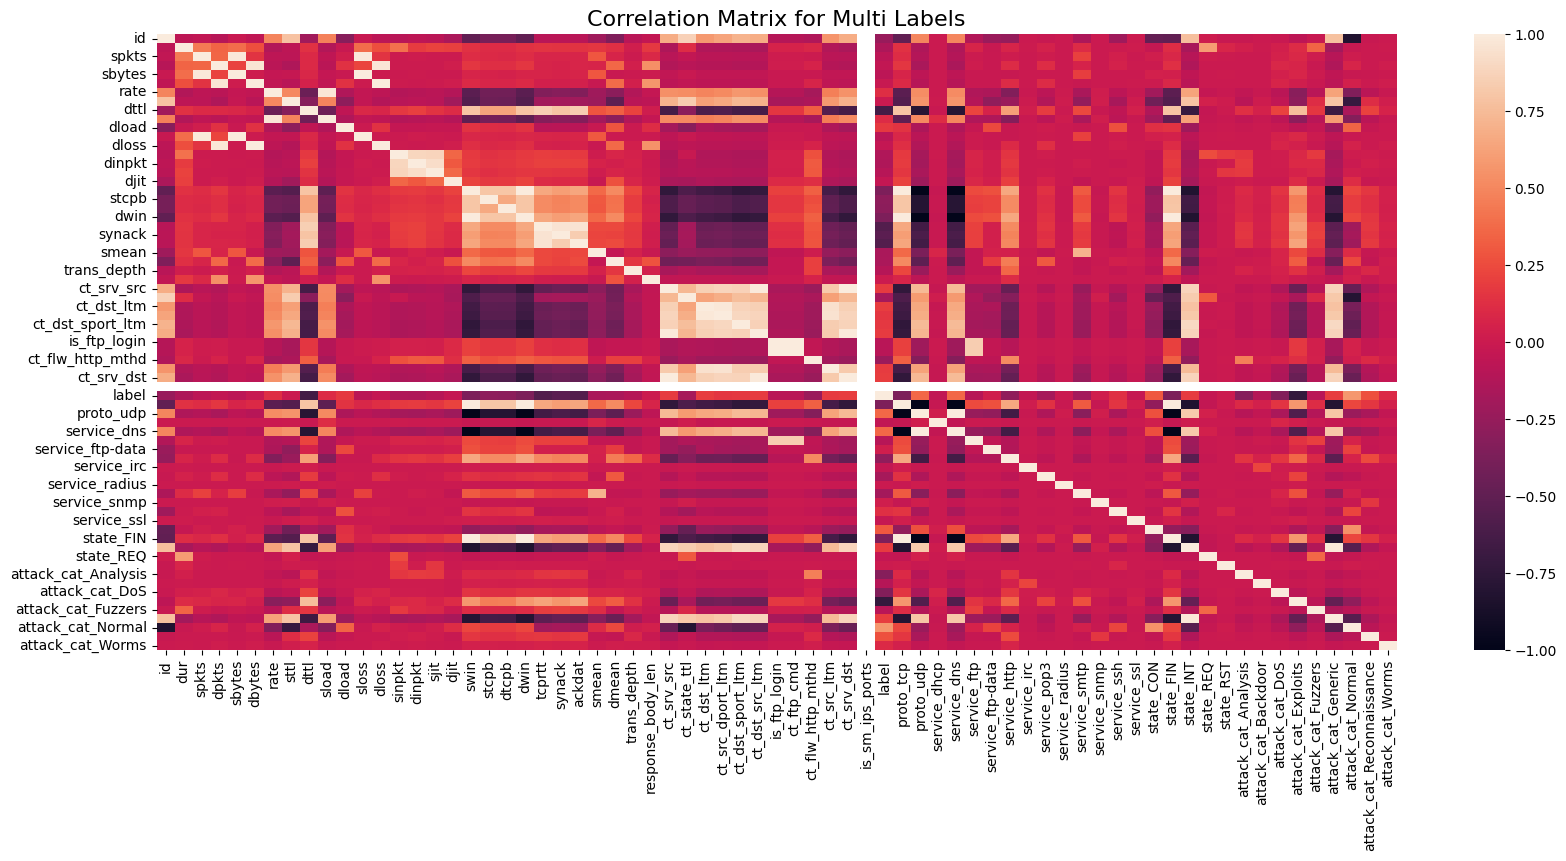

In [55]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('correlation_matrix_multi.png')
plt.show()

Feature Selection

Binary Labels

In [56]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

sload               0.334562
dload               0.343910
rate                0.344535
ct_src_ltm          0.368486
ct_dst_ltm          0.387358
ct_src_dport_ltm    0.444874
ct_srv_dst          0.459984
ct_srv_src          0.463153
ct_dst_src_ltm      0.463735
ct_dst_sport_ltm    0.497234
state_INT           0.546631
state_CON           0.552505
sttl                0.707337
ct_state_ttl        0.801403
label               1.000000
Name: label, dtype: float64

In [57]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'state_CON', 'state_INT', 'label'],
      dtype='object')

In [58]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,state_CON,state_INT,label
3,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.016949,0.000000,0.0,0.0,1
11,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.000000,0.0,0.0,1
15,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.016949,0.000000,0.0,1.0,1
17,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.039216,0.0,0.0,1
21,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.016949,0.039216,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.166667,0.995536,0.032986,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.542373,0.862745,0.0,1.0,0
175336,0.111111,0.995536,0.021991,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.389831,0.450980,0.0,1.0,0
175338,0.111111,0.995536,0.021991,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.033898,0.215686,0.0,1.0,0
175339,0.111111,0.995536,0.021991,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.491525,0.568627,0.0,1.0,0


In [59]:
bin_data.to_csv('.bin_data.csv')

Multi-class Labels

In [60]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

state_CON              0.302853
attack_cat_Analysis    0.326209
attack_cat_DoS         0.339669
state_FIN              0.361750
proto_udp              0.364393
swin                   0.364393
dwin                   0.364393
proto_tcp              0.364393
service_dns            0.365346
synack                 0.524027
ackdat                 0.570098
tcprtt                 0.570205
attack_cat_Normal      0.570858
dttl                   0.646589
attack_cat_Exploits    0.719733
label                  1.000000
Name: label, dtype: float64

In [61]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label',
       'proto_tcp', 'proto_udp', 'service_dns', 'state_CON', 'state_FIN',
       'attack_cat_Analysis', 'attack_cat_DoS', 'attack_cat_Exploits',
       'attack_cat_Normal'],
      dtype='object')

In [62]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

In [63]:
multi_data.to_csv('.multi_data.csv')

BINARY CLASSIFICATION

Data Splitting

In [64]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [66]:
 rf_bin = RandomForestClassifier(random_state=123)
 rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [67]:
y_pred = rf_bin.predict(X_test)

In [68]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.013550970126270403
Mean Squared Error -  0.013550970126270403
Root Mean Squared Error -  0.1164086342427846
R2 Score -  92.59509512345335
Accuracy -  98.64490298737296


In [69]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     12326
      normal       0.98      0.96      0.97      3909

    accuracy                           0.99     16235
   macro avg       0.98      0.98      0.98     16235
weighted avg       0.99      0.99      0.99     16235



In [70]:
# Evaluate the Random Forest model
print("Random Forest Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Classifier:
Confusion Matrix:
 [[12247    79]
 [  141  3768]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12326
           1       0.98      0.96      0.97      3909

    accuracy                           0.99     16235
   macro avg       0.98      0.98      0.98     16235
weighted avg       0.99      0.99      0.99     16235

Accuracy: 0.9864490298737296


In [71]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

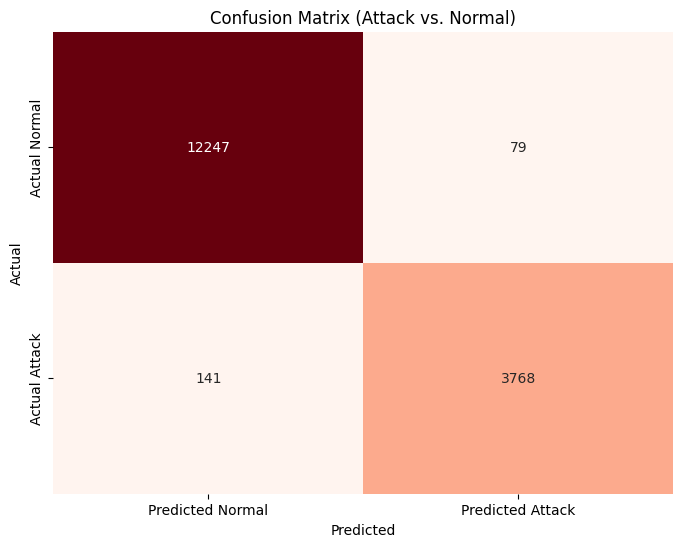

In [72]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"],
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Attack vs. Normal)")
plt.show()

Real and Predicted Data

In [73]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df.to_csv('.rf_real_pred_bin.csv')
rf_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


Plot between Real and Predicted Data

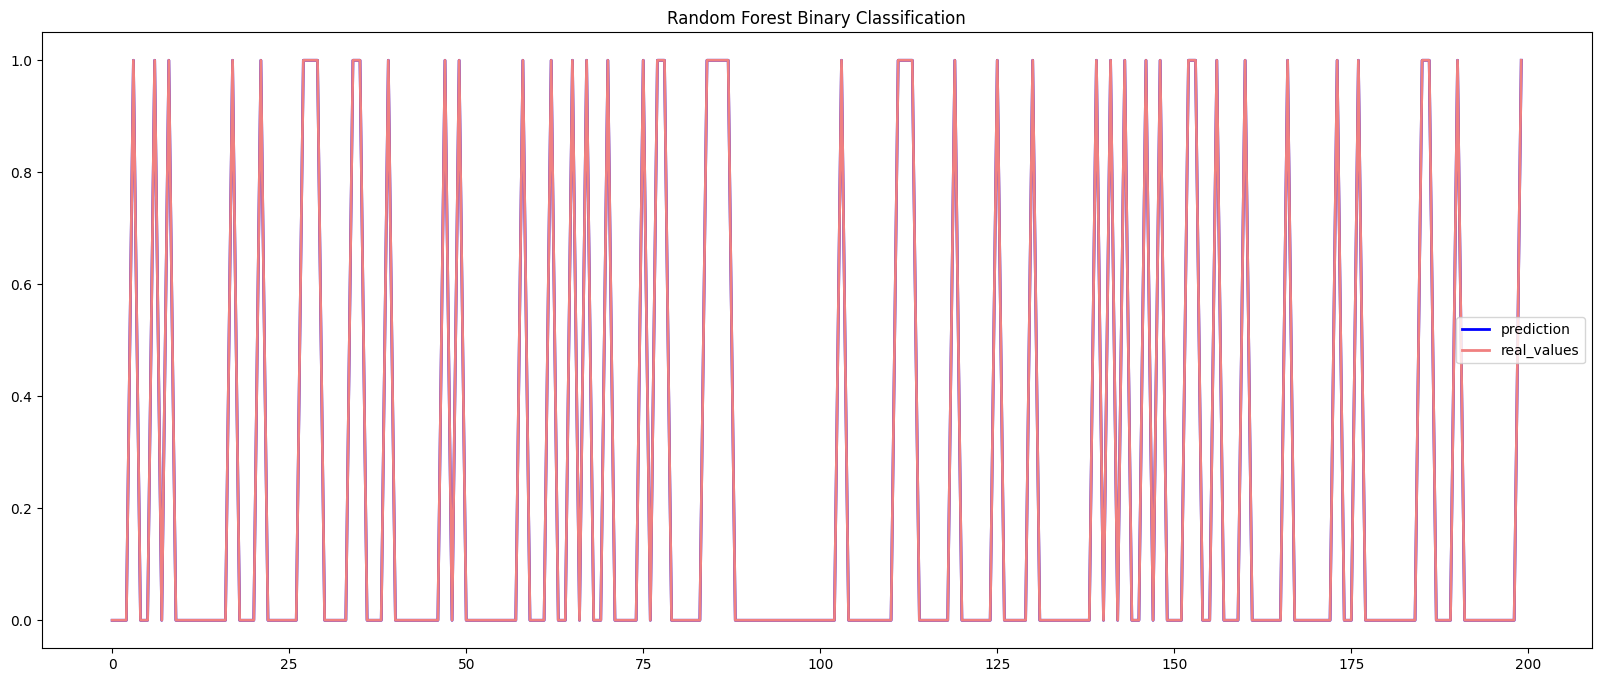

In [74]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.savefig('rf_real_pred_bin.png')
plt.show()

Saving Trained Model to Disk

In [75]:
pkl_filename = "./random_forest_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


Decision Tree Classifier

In [76]:
dt_bin = DecisionTreeClassifier(random_state=123)
dt_bin.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [77]:
y_pred = dt_bin.predict(X_test)

In [78]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.019094548814290114
Mean Squared Error -  0.019094548814290114
Root Mean Squared Error -  0.13818302650575473
R2 Score -  89.55757103838098
Accuracy -  98.09054511857099


In [79]:
# Evaluate the Random Forest model
print("Decision Tree Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Classifier:
Confusion Matrix:
 [[12152   174]
 [  136  3773]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12326
           1       0.96      0.97      0.96      3909

    accuracy                           0.98     16235
   macro avg       0.97      0.98      0.97     16235
weighted avg       0.98      0.98      0.98     16235

Accuracy: 0.9809054511857099


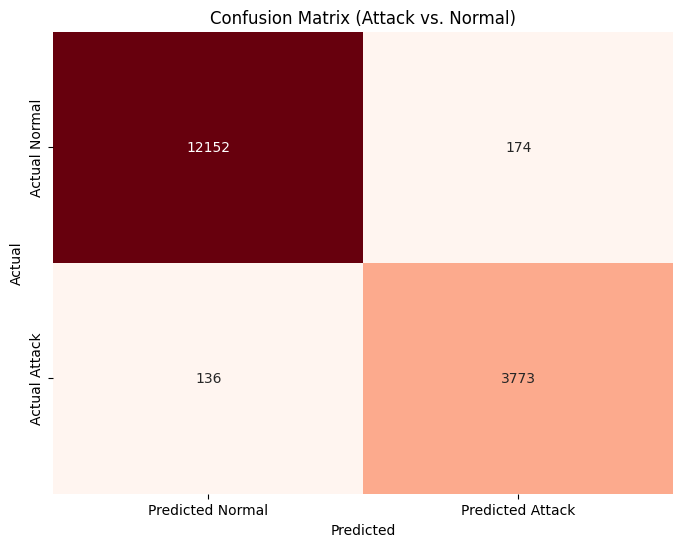

In [80]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"],
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Attack vs. Normal)")
plt.show()

Real and Predicted Data

In [81]:
dt_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_bin_df.to_csv('./dt_real_pred_bin.csv')
dt_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


Plot between Real and Predicted Data

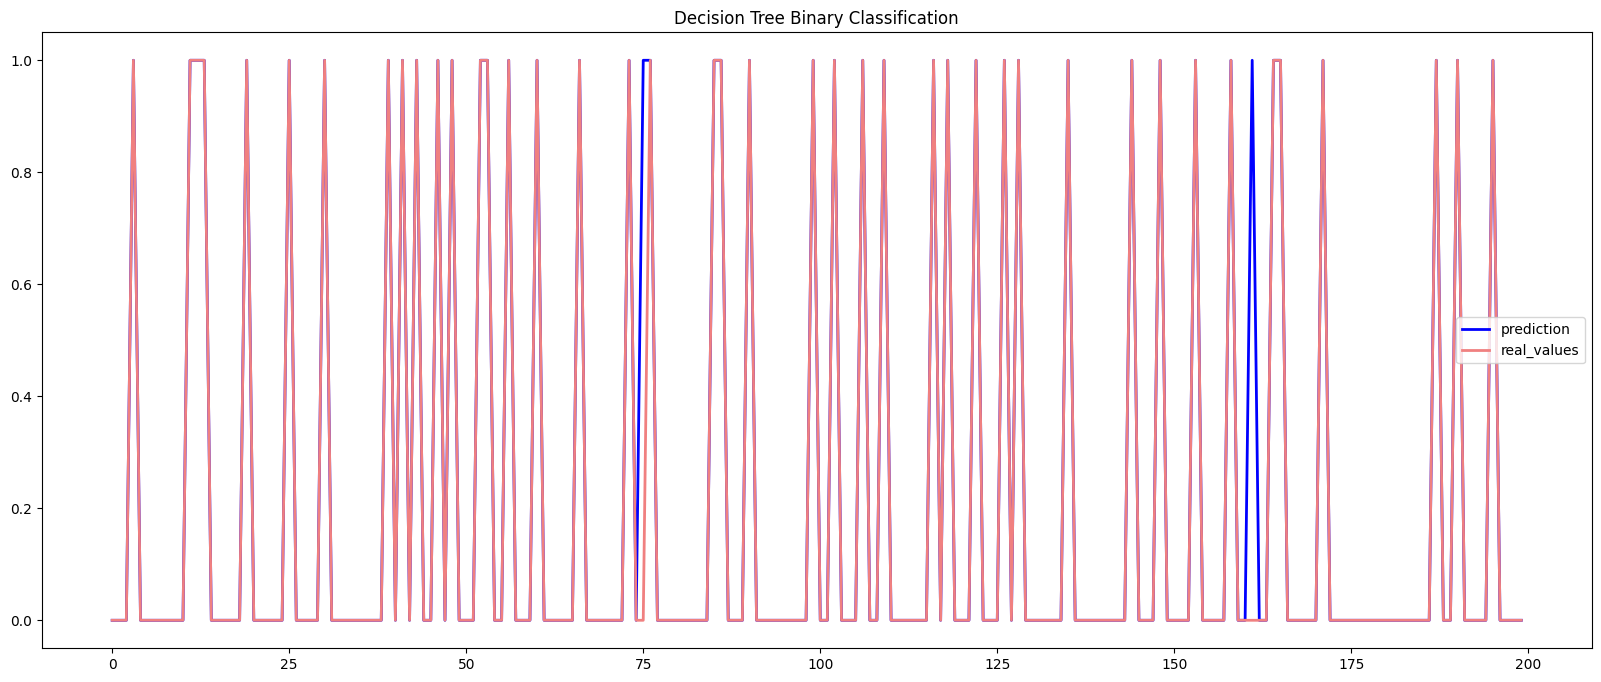

In [82]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Binary Classification")
plt.savefig('dt_real_pred_bin.png')
plt.show()

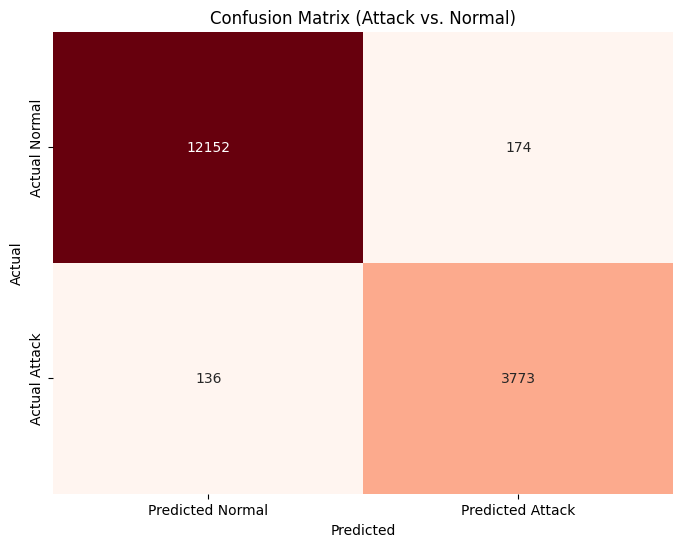

In [83]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"],
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Attack vs. Normal)")
plt.show()

Saving Trained Model to Disk

In [84]:
pkl_filename = "./decision_tree_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


MULTI-CLASS CLASSIFICATION

Data Splitting

In [85]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

Random Forest Classifier

In [87]:
rf_multi = RandomForestClassifier(random_state=50)
rf_multi.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [88]:
y_pred = rf_multi.predict(X_test)

In [89]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06611366622864652
Mean Squared Error -  0.1985052562417871
Root Mean Squared Error -  0.4455392869790352
R2 Score -  86.6379909424011
Accuracy -  97.31849540078844


In [90]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.08      0.03      0.05        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.49      0.43      0.46       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.54      0.60      0.57       502
         Worms       0.12      0.07      0.09        29

      accuracy                           0.97     24352
     macro avg       0.69      0.68      0.68     24352
  weighted avg       0.97      0.97      0.97     24352



In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score for each attack category
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Create a DataFrame
data = {
    'Attack': le2.classes_,
    'Accuracy (%)': [accuracy * 100] * len(le2.classes_),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

           Attack  Accuracy (%)  Precision    Recall  F1 Score
0        Analysis     97.318495   1.000000  1.000000  1.000000
1        Backdoor     97.318495   0.083333  0.031250  0.045455
2             DoS     97.318495   1.000000  1.000000  1.000000
3        Exploits     97.318495   1.000000  1.000000  1.000000
4         Fuzzers     97.318495   0.487696  0.429134  0.456545
5         Generic     97.318495   0.988376  0.991131  0.989752
6          Normal     97.318495   1.000000  1.000000  1.000000
7  Reconnaissance     97.318495   0.536412  0.601594  0.567136
8           Worms     97.318495   0.125000  0.068966  0.088889


Real and Predicted Data

In [92]:
rf_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_multi_df.to_csv('./rf_real_pred_multi.csv')
rf_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


Plot between Real and Predicted Data

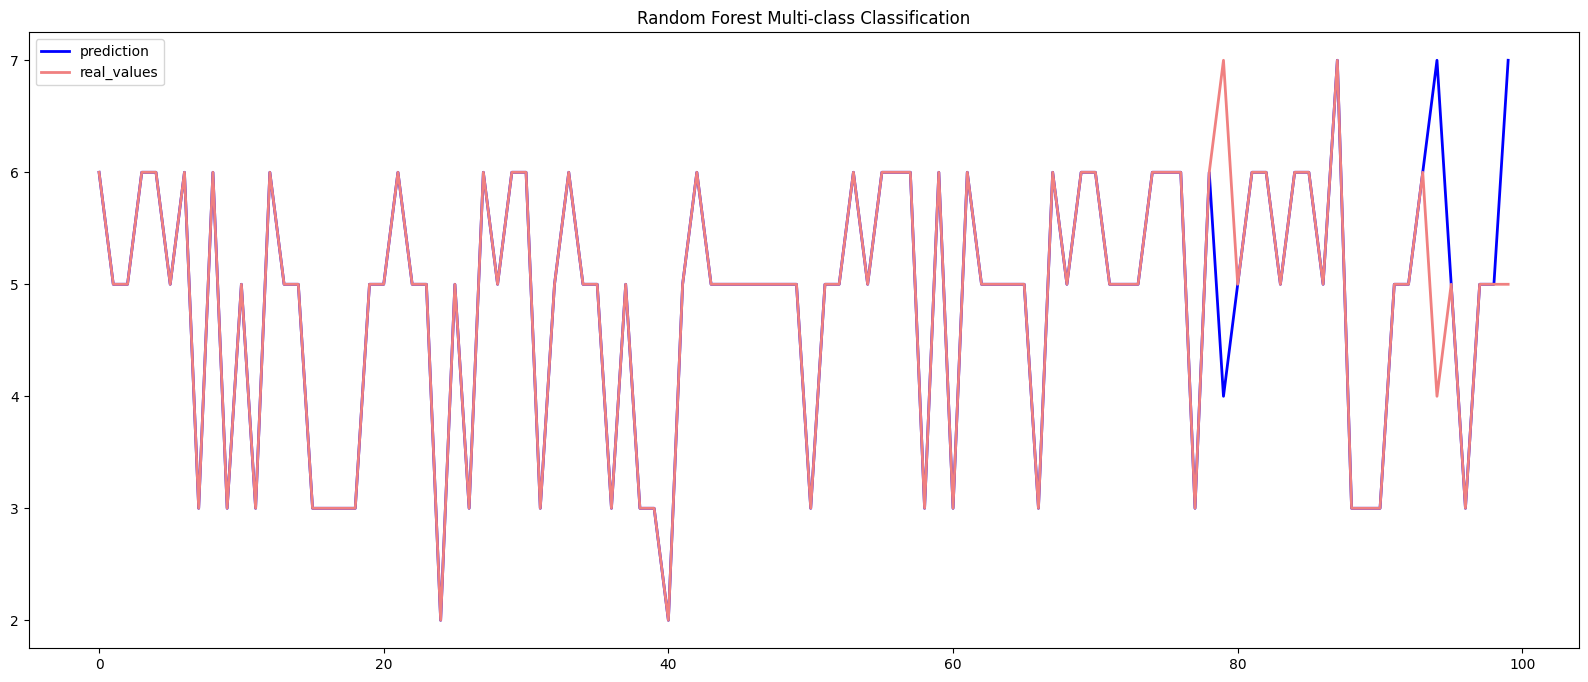

In [93]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.savefig('rf_real_pred_multi.png')
plt.show()

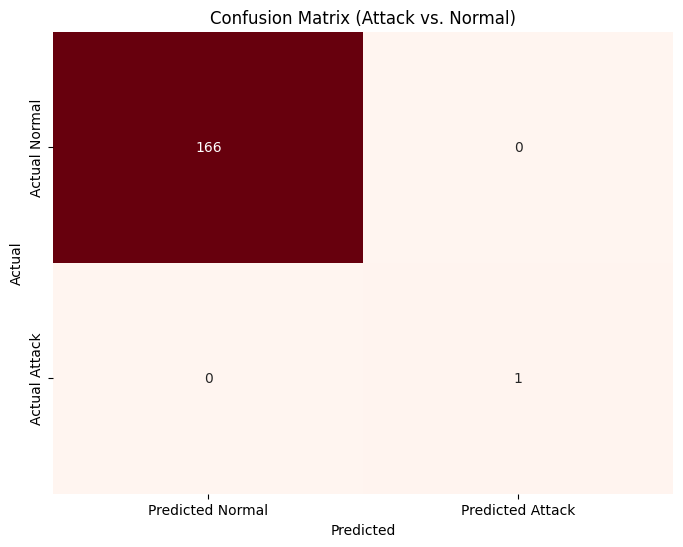

In [94]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"],
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Attack vs. Normal)")
plt.show()

Saving Trained Model to Disk

In [211]:
pkl_filename = "./random_forest_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


Decision Tree Classifier

In [212]:
dt_multi = DecisionTreeClassifier(random_state=123)
dt_multi.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [95]:
y_pred = dt_multi.predict(X_test)

In [213]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06611366622864652
Mean Squared Error -  0.1985052562417871
Root Mean Squared Error -  0.4455392869790352
R2 Score -  86.6379909424011
Accuracy -  97.31849540078844


In [214]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.08      0.03      0.05        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.49      0.43      0.46       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.54      0.60      0.57       502
         Worms       0.12      0.07      0.09        29

      accuracy                           0.97     24352
     macro avg       0.69      0.68      0.68     24352
  weighted avg       0.97      0.97      0.97     24352



Real and Predicted Data

In [98]:
dt_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_multi_df.to_csv('./dt_real_pred_multi.csv')
dt_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


Plot between Real and Predicted Data

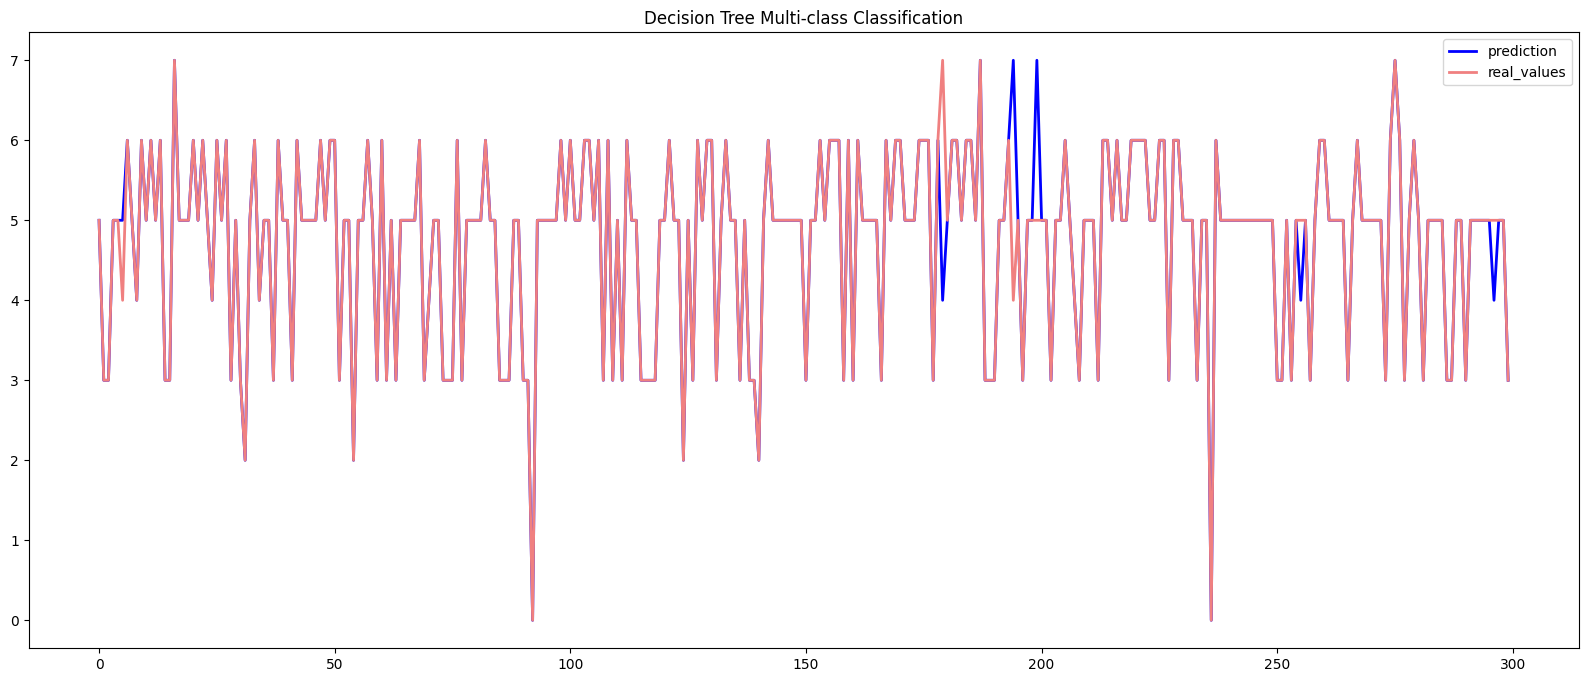

In [99]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:700], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:700].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Multi-class Classification")
plt.savefig('dt_real_pred_multi.png')
plt.show()

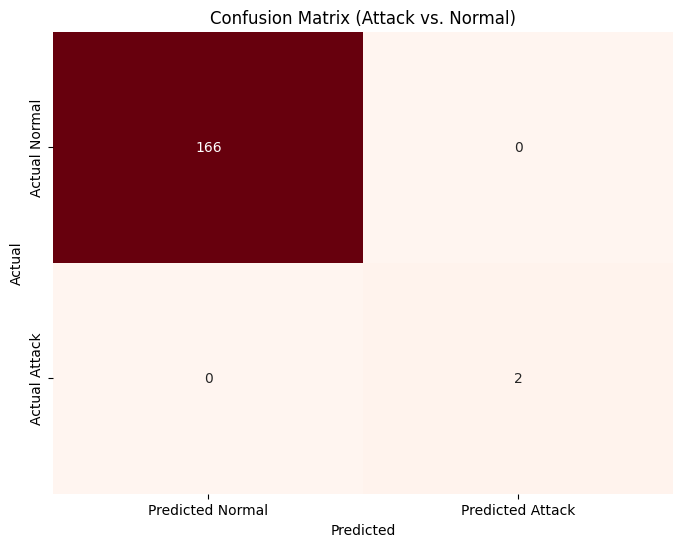

In [100]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"],
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Attack vs. Normal)")
plt.show()

In [215]:
# Calculate accuracy, precision, recall, and F1-score for each attack category
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Create a DataFrame
data = {
    'Attack': le2.classes_,
    'Accuracy (%)': [accuracy * 100] * len(le2.classes_),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)


           Attack  Accuracy (%)  Precision    Recall  F1 Score
0        Analysis     97.318495   1.000000  1.000000  1.000000
1        Backdoor     97.318495   0.083333  0.031250  0.045455
2             DoS     97.318495   1.000000  1.000000  1.000000
3        Exploits     97.318495   1.000000  1.000000  1.000000
4         Fuzzers     97.318495   0.487696  0.429134  0.456545
5         Generic     97.318495   0.988376  0.991131  0.989752
6          Normal     97.318495   1.000000  1.000000  1.000000
7  Reconnaissance     97.318495   0.536412  0.601594  0.567136
8           Worms     97.318495   0.125000  0.068966  0.088889


Saving Trained Model to Disk

In [101]:
pkl_filename = "./decision_tree_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


**Full Connected Convolutional neural network (CNN)**

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [218]:
X = bin_data.drop(columns=['label'], axis=1)
Y = bin_data['label']

In [219]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [220]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [221]:
# Build the binary classification model
binary_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
binary_model.summary()

history_binary = binary_model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_val_scaled, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1920      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1015/1015 [============================

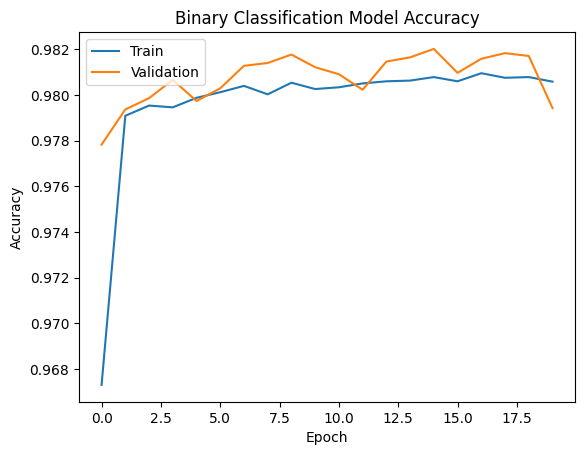

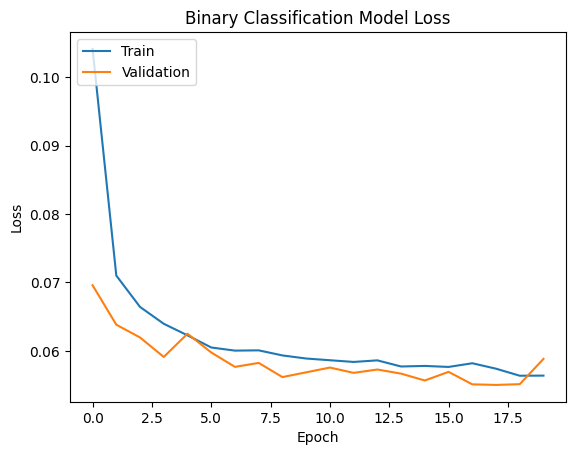

In [222]:
# Plot training & validation accuracy values
plt.plot(history_binary.history['accuracy'])
plt.plot(history_binary.history['val_accuracy'])
plt.title('Binary Classification Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_binary.history['loss'])
plt.plot(history_binary.history['val_loss'])
plt.title('Binary Classification Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


508/508 [==============================] - 1s 836us/step


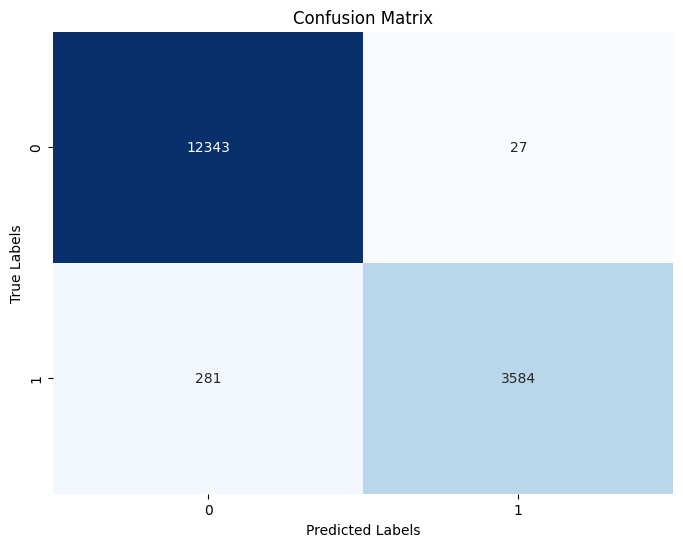

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12370
           1       0.99      0.93      0.96      3865

    accuracy                           0.98     16235
   macro avg       0.99      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



In [108]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict binary labels on the validation set
y_val_pred = binary_model.predict(X_val_scaled)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_val_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print(classification_report(y_val, y_val_pred_binary))


In [109]:
import joblib
# Save binary classification CNN model
binary_model_filename = "binary_cnn_model.pkl"
if not path.isfile(binary_model_filename):
    joblib.dump(binary_model, binary_model_filename)
    print("Saved binary classification CNN model to disk")
else:
    print("Binary classification CNN model already saved")

Binary classification CNN model already saved


Multi-Class Classification

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

In [111]:
# Load and preprocess your data
X = multi_data.drop(columns=['label'], axis=1)
Y = multi_data['label']

In [112]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [113]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(Y)), activation='softmax')  # Using softmax for multi-class
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_multi = model.fit(X_train_scaled, Y_train, validation_data=(X_val_scaled, Y_val), epochs=10, batch_size=32)

Epoch 1/10
2030/2030 [==============================] - 3s 1ms/step - loss: 0.1305 - accuracy: 0.9627 - val_loss: 0.0745 - val_accuracy: 0.9717
Epoch 2/10
2030/2030 [==============================] - 4s 2ms/step - loss: 0.0793 - accuracy: 0.9734 - val_loss: 0.0754 - val_accuracy: 0.9738
Epoch 3/10
2030/2030 [==============================] - 3s 1ms/step - loss: 0.0787 - accuracy: 0.9738 - val_loss: 0.0730 - val_accuracy: 0.9749
Epoch 4/10
2030/2030 [==============================] - 3s 1ms/step - loss: 0.0782 - accuracy: 0.9741 - val_loss: 0.0726 - val_accuracy: 0.9762
Epoch 5/10
2030/2030 [==============================] - 3s 1ms/step - loss: 0.0782 - accuracy: 0.9742 - val_loss: 0.0721 - val_accuracy: 0.9771
Epoch 6/10
2030/2030 [==============================] - 4s 2ms/step - loss: 0.0781 - accuracy: 0.9740 - val_loss: 0.0720 - val_accuracy: 0.9770
Epoch 7/10
2030/2030 [==============================] - 3s 1ms/step - loss: 0.0780 - accuracy: 0.9743 - val_loss: 0.0724 - val_accuracy:

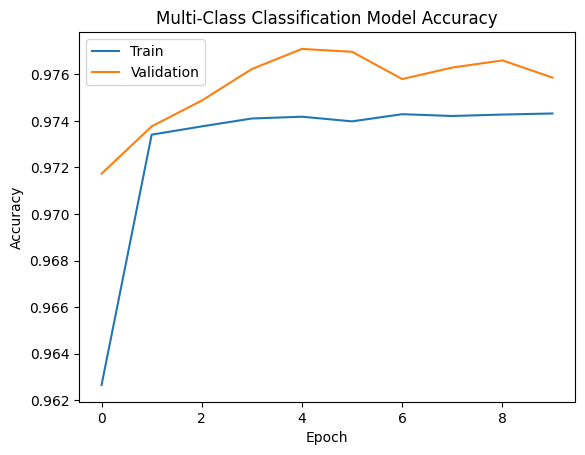

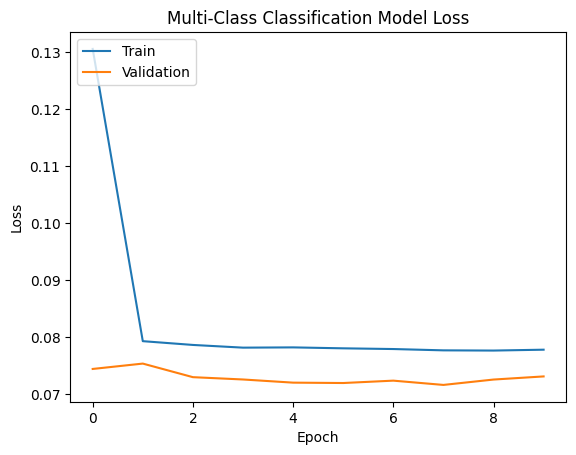

In [114]:
# Plot training & validation accuracy values
plt.plot(history_multi.history['accuracy'])
plt.plot(history_multi.history['val_accuracy'])
plt.title('Multi-Class Classification Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_multi.history['loss'])
plt.plot(history_multi.history['val_loss'])
plt.title('Multi-Class Classification Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

508/508 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       0.00      0.00      0.00        17
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00      3309
           4       0.59      0.40      0.48       355
           5       0.99      0.99      0.99      7828
           6       1.00      1.00      1.00      3865
           7       0.54      0.81      0.65       339
           8       0.00      0.00      0.00        29

    accuracy                           0.98     16235
   macro avg       0.68      0.69      0.68     16235
weighted avg       0.97      0.98      0.97     16235



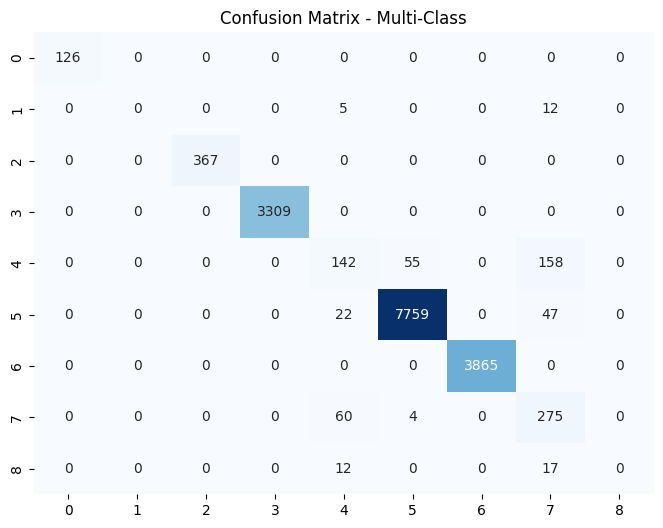

In [116]:
# Predict multi-class labels on the validation set
y_val_pred = model.predict(X_val_scaled)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(Y_val, y_val_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Multi-Class")
plt.xlabel

# Print classification report
print(classification_report(Y_val, y_val_pred_classes))

In [ ]:
# Save multi-class classification CNN model
multi_model_filename = "multi_cnn_model.pkl"
if not path.isfile(multi_model_filename):
    joblib.dump(model, multi_model_filename)
    print("Saved multi-class CNN model to disk")
else:
    print("Multi-class CNN model already saved")